# Code status - Joanna

## What's covered:
- Creates 3 scattered plots showing the for ANS scores vs other scores
- Creates the Spearman Rank Correlation Coefficient (rho) for ANS scores vs other scores
- Creates a table showing the rho and P value for ANS scores vs other scores

## Any bugs 🐛?
- No bugs, everything works perfectly 🎉

## Potential improvements 📖:
- Calculate the P value by code instead of manually computing using external software (https://www.graphpad.com/quickcalcs/pvalue1.cfm)

In [2]:
import matplotlib.pyplot as m
import csv

In [4]:
# Create a list of all tests
test_list = ['ans', 'math', 'spatial', 'memory']

# Create dictionaries to store the row items
# within the accuracy rate and rank column as strings
# including the header
accuracy_col_dict = {}
rank_col_dict = {}

# Create a dictionary to store the scores for the tests and the rank
# by each individual as integers
accuracy_int_dict = {}
rank_int_dict = {}

In [5]:
def get_score(test, column_index1, column_index2):
    # Opens and reads the test csv file
    file = open('Results.csv')
    csvreader = csv.reader(file)

    # Add the test score and test score rank to the list value
    for row in csvreader:
        accuracy_col_dict[test].append(row[column_index1])
        rank_col_dict[test].append(row[column_index2])
    
    # Close the file after processing
    file.close()

    return accuracy_col_dict

i = 1


for test in test_list:

    # i is the corresponding column for the scores of each test
    # u is the corresponding column for the ranks of the scores of each test
    i = i + 1
    u = i + 4

    # Insert key:value pairs in the dictionaries
    # Key is the test, value is an empty list to accept test scores
    accuracy_col_dict[test] = []
    accuracy_int_dict[test] = []

    # Key is the test, value is an empty list to accept test score ranks
    rank_col_dict[test] = []
    rank_int_dict[test] = []

    # Record the scores and score ranks for each test
    get_score(test, i, u)

    # Remove the column names from the lists
    for value in accuracy_col_dict[test]:
        if value != f"{test}_correct_rate":
            accuracy_int_dict[test].append(float(value))

    for value in rank_col_dict[test]:
        if value != f"{test}_rank":
            rank_int_dict[test].append(float(value))

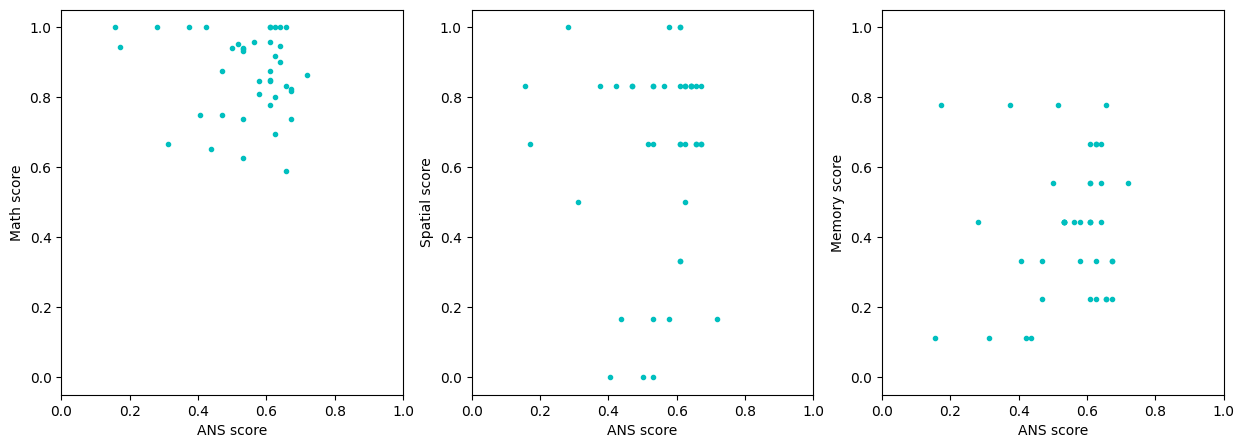

In [51]:
# Plot for ANS against Math, Spatial, and Memory abilities

fig, (ax1, ax2, ax3) = m.subplots(1, 3, figsize=(15, 5))

ax1.plot(accuracy_int_dict['ans'], accuracy_int_dict['math'], "c.")
ax2.plot(accuracy_int_dict['ans'], accuracy_int_dict['spatial'], "c.")
ax3.plot(accuracy_int_dict['ans'], accuracy_int_dict['memory'], "c.")

# Axis labels are set
# x and y axis bounds are set to view the scatter in scale
# Bounds are slightly over 0 and 1
# to improve the visibility of dots at exactly those values to readers
ax1.set_xlabel('ANS score')
ax1.set_ylabel('Math score')
ax1.set_xbound(lower=0, upper=1)
ax1.set_ybound(lower=-0.05, upper=1.05)

ax2.set_xlabel('ANS score')
ax2.set_ylabel('Spatial score')
ax2.set_xbound(lower=0, upper=1)
ax2.set_ybound(lower=-0.05, upper=1.05)

ax3.set_xlabel('ANS score')
ax3.set_ylabel('Memory score')
ax3.set_xbound(lower=0, upper=1)
ax3.set_ybound(lower=-0.05, upper=1.05)

In [14]:
# Create dictionaries to store the square of the rank differences
# and the final rho value
# for ANS with each of the other tests
d_square_dict = {}
rho_dict = {}

# Define the n as the number of scores collected
# and df as the degree of freedom
n = len(rank_int_dict['ans'])
df = n - 2

# Define the function to calculate the Spearman's rank coefficient (rho)
def calculate_rho(test):
    for i in range(n):
        d_square_dict[test].append((rank_int_dict['ans'][i] - rank_int_dict[test][i])**2)

    # Calculate the sum of the d squares for each test with ANS
    # and record them in the same dictionary
    d_square_dict[f'{test}_sum'] = sum(d_square_dict[test])

    rho_dict[test] = 1 - (6*(d_square_dict[f'{test}_sum']))/(n*(n**2-1))

    return d_square_dict, rho_dict

# Calculate the rho of the ans score
# and each of the other test scores
for test in test_list:
    if test != 'ans':
        d_square_dict[test] = []
        calculate_rho(test)

print(rho_dict)

{'math': -0.13236062717770025, 'spatial': 0.0702526132404181, 'memory': 0.12358449477351918}


|   |ANS and Math|ANS and Spatial|ANS and Memory|
|---|------------|---------------|--------------|
|rho|   -0.132   |     0.070     |     0.124    |
|P  |    0.409   |     0.663     |     0.441    |

In [15]:
# # Calculate the mean and standard deviation for the scores of each test
# # and store in dictionaries
# mean_dict = {}
# sd_dict = {}

# for test in test_list:
#     mean_dict[test] = sum(accuracy_int_dict[test])/n
#     total_diff = 0
#     for i in range(n):
#         total_diff += (accuracy_int_dict[test][i] - mean_dict[test])**2

#     sd_dict[test] = (total_diff/n)**(1/2)